# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = pd.read_csv('../data/boston_data.csv')

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston.shape

(404, 14)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


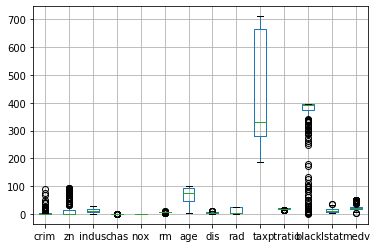

In [7]:
boston.boxplot()
plt.show()

In [8]:
def whisker_max(x):
    return x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))

In [9]:
def whisker_min(x):
    return x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))

In [10]:
boston[(boston > whisker_max(boston)) | (boston < whisker_min(boston))].count() / boston.shape[0] * 100

crim       10.396040
zn         12.128713
indus       0.000000
chas        6.930693
nox         0.000000
rm          5.198020
age         0.000000
dis         1.237624
rad         0.000000
tax         0.000000
ptratio     2.970297
black      15.099010
lstat       0.495050
medv        6.683168
dtype: float64

In [11]:
boston = boston[(boston['chas'] <= whisker_max(boston['chas'])) & (boston['chas'] >= whisker_min(boston['chas']))]
boston = boston[(boston['rm'] <= whisker_max(boston['rm'])) & (boston['rm'] >= whisker_min(boston['rm']))]
boston = boston[(boston['dis'] <= whisker_max(boston['dis'])) & (boston['dis'] >= whisker_min(boston['dis']))]
boston = boston[(boston['ptratio'] <= whisker_max(boston['ptratio'])) & (boston['ptratio'] >= whisker_min(boston['ptratio']))]
boston = boston[(boston['lstat'] <= whisker_max(boston['lstat'])) & (boston['lstat'] >= whisker_min(boston['lstat']))]

In [12]:
boston.shape

(341, 14)

In [13]:
(404 - 341) / 404 * 100

15.594059405940595

In [14]:
boston[(boston > whisker_max(boston)) | (boston < whisker_min(boston))].count() / boston.shape[0] * 100

crim        9.384164
zn         23.167155
indus       0.000000
chas        0.000000
nox         0.000000
rm          1.173021
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black      15.542522
lstat       0.000000
medv        2.346041
dtype: float64

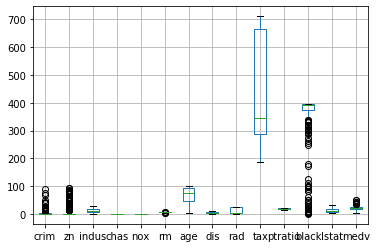

In [15]:
boston.boxplot()
plt.show()

In [16]:
"""
There are still too many outliers in some columns, so it makes no sense to remove the other.
I'll get back to the original dataset with all points.
"""

"\nThere are still too many outliers in some columns, so it makes no sense to remove the other.\nI'll get back to the original dataset with all points.\n"

In [17]:
"""
With z-score:

from scipy import stats
z = np.abs(stats.zscore(boston))
boston = boston[(z < 3).all(axis=1)]
"""

'\nWith z-score:\n\nfrom scipy import stats\nz = np.abs(stats.zscore(boston))\nboston = boston[(z < 3).all(axis=1)]\n'

In [18]:
boston = pd.read_csv('../data/boston_data.csv')

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

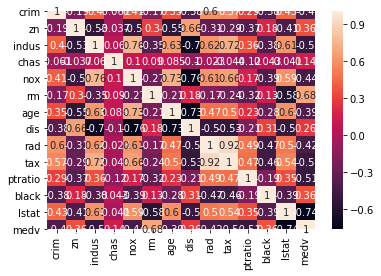

In [19]:
# Your plots here
sns.heatmap(boston.corr(), annot=True);

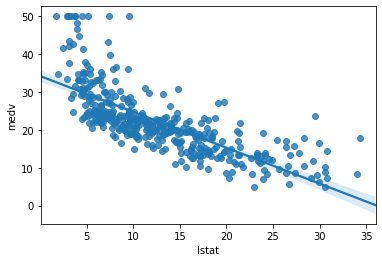

In [20]:
sns.regplot(boston['lstat'], boston['medv']);

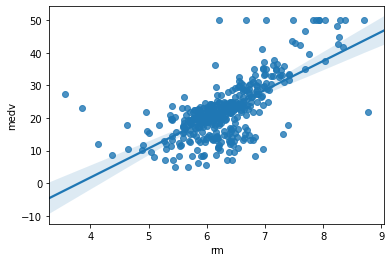

In [21]:
sns.regplot(boston['rm'], boston['medv']);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [22]:
# Your response here
"""
The 'lstat' (% lower status of the population) has a negative linear relation with the price and the 'rm'
(average number of rooms per dwelling) has a positive linear relation with the price, both relations are
what I would expect from these variables.
"""

"\nThe 'lstat' (% lower status of the population) has a negative linear relation with the price and the 'rm'\n(average number of rooms per dwelling) has a positive linear relation with the price, both relations are\nwhat I would expect from these variables.\n"

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [23]:
# Your response here
"""
Done above.
"""

'\nDone above.\n'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [24]:
# Your code here
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [25]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [26]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston.drop(columns=['medv'])
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#, shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

In [28]:
max_depth = [2,4,6,8,10]

In [29]:
test_score = []
train_score = []

for i in max_depth :
    regr = RandomForestRegressor(max_depth=i)
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    test_score.append(performance_metric(y_test, y_test_pred))
    train_score.append(performance_metric(y_train, y_train_pred))

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Now, plot the score for each tree on the training set and on the testing set.

In [30]:
# Produce a plot with the score for the testing and training for the different max depths

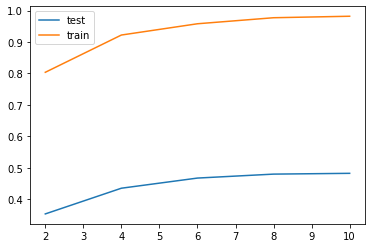

In [31]:
plt.plot(max_depth, test_score, label='test')
plt.plot(max_depth, train_score, label='train')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [32]:
# Your response here
"""
As I used the r2_score metric, what I see is that the greater the max_depth parameter the best is the prediction
of the model (r2 closer to 1).
That incresing tendency happens with both test and train data, but obviously the train gets higher values than the test
becuase the model was build with the train.
"""

'\nAs I used the r2_score metric, what I see is that the greater the max_depth parameter the best is the prediction\nof the model (r2 closer to 1).\nThat incresing tendency happens with both test and train data, but obviously the train gets higher values than the test\nbecuase the model was build with the train.\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [33]:
# Your response here

In [34]:
from sklearn.metrics import mean_absolute_error

test_score = []
train_score = []

for i in max_depth :
    regr = RandomForestRegressor(max_depth=i)
    regr.fit(X_train, y_train)
    y_test_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    test_score.append(mean_absolute_error(y_test, y_test_pred))
    train_score.append(mean_absolute_error(y_train, y_train_pred))

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

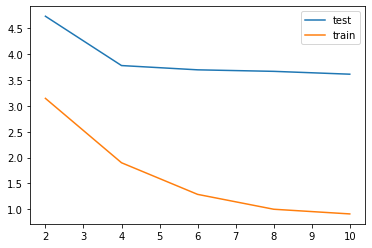

In [35]:
plt.plot(max_depth, test_score, label='test')
plt.plot(max_depth, train_score, label='train')
plt.legend()
plt.show()

In [36]:
"""
As the max_depth increases, the model tends to overfit, meaning it has low bias and high variance.
"""

'\nAs the max_depth increases, the model tends to overfit, meaning it has low bias and high variance.\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [37]:
# Your response here
"""
I think that max_depth=6 is the optimum value, with best compromise between high r2 and low MAE.
(Computation of MAE is above)
"""

'\nI think that max_depth=6 is the optimum value, with best compromise between high r2 and low MAE.\n(Computation of MAE is above)\n'

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [40]:
# Your response here
"""
- In real estate prices evolve every year so the data from 1978 would not be usefull to predict in 2020.
- No, there are not enough features describing the home itself, there is only the average number of rooms.
- This model is not robust enough (even at the max_depth=6) because although the MAE is low the r2 is not even 50%
(for the test data).
- The features related to the location are quite specific for a urban city, for a rural city there should be other type
of features.
"""

'\n- In real estate prices evolve every year so the data from 1978 would not be usefull to predict in 2020.\n- No, there are not enough features describing the home itself, there is only the average number of rooms.\n- This model is not robust enough (even at the max_depth=6) because although the MAE is low the r2 is not even 50%\n(for the test data).\n- The features related to the location are quite specific for a urban city, for a rural city there should be other type\nof features.\n'

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu